In [22]:

# data retrieved from Zillow: https://www.zillow.com/research/data/
# for academic and personal use only
# 2 csv files can be downloaded at the above zillow website


import os
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\iamdi\Dropbox\EastBay\misc\oo\learning python\zillow housing price data')

sfr=pd.read_csv('Metro_zhvi_uc_sfr_tier_0.33_0.67_sm_sa_month.csv')
con=pd.read_csv('Metro_zhvi_uc_condo_tier_0.33_0.67_sm_sa_month.csv')

# reshape data into long format
sfr=pd.melt(sfr,
            id_vars=['RegionName','RegionType','StateName','SizeRank'],
            value_vars=[x for x in sfr.columns if '19' in x or '20' in x],
            var_name='month',
            value_name='sfr')
con=pd.melt(con,
            id_vars=['RegionName'],
            value_vars=[x for x in con.columns if '19' in x or '20' in x],
            var_name='month',
            value_name='con')

# merge single family and condo data
d=sfr
d=d.merge(con,on=['RegionName','month'])
d=d.sort_values(by=['SizeRank','month'])


# remove country level 
d=d[d['RegionType']=='Msa']

# since we only have monthly data, we can remove the day info from month variable
d['month']=d['month'].str[0:7]

In [23]:
d.head(10)

,RegionName,RegionType,StateName,SizeRank,month,sfr,con
1,"New York, NY",Msa,NY,1,1996-01,190921.0,158187.0
809,"New York, NY",Msa,NY,1,1996-02,190475.0,157832.0
1617,"New York, NY",Msa,NY,1,1996-03,190193.0,157631.0
2425,"New York, NY",Msa,NY,1,1996-04,189646.0,157277.0
3233,"New York, NY",Msa,NY,1,1996-05,189313.0,157112.0
4041,"New York, NY",Msa,NY,1,1996-06,189008.0,156971.0
4849,"New York, NY",Msa,NY,1,1996-07,188822.0,156854.0
5657,"New York, NY",Msa,NY,1,1996-08,188730.0,156781.0
6465,"New York, NY",Msa,NY,1,1996-09,188773.0,156834.0
7273,"New York, NY",Msa,NY,1,1996-10,188898.0,156947.0


Text(0, 0.5, 'Typical Home Price, in US $')

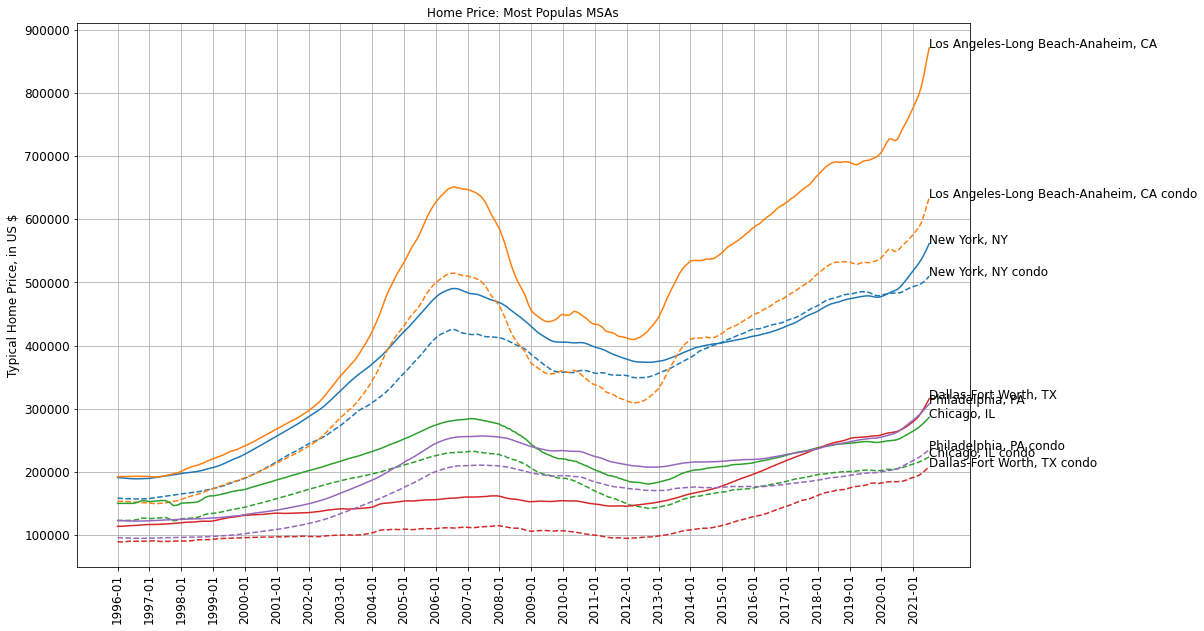

In [24]:
# plot of the most populas MSAs

plt.figure(num=1,figsize=(16,10))
plt.clf()
freqeuency=12

for i in range(5):
    temp=d[d['SizeRank']==i+1]
    line,=plt.plot(temp['month'],
             temp['sfr'],'-',
             label=temp['RegionName'].values[0])
    plt.plot(temp['month'],
             temp['con'],'--',
             color=line.get_color(),
             label=temp['RegionName'].values[0])
    plt.text(d['month'].values[-1],
             temp['sfr'].values[-1],
             temp['RegionName'].values[0])
    plt.text(d['month'].values[-1],
             temp['con'].values[-1],
             temp['RegionName'].values[0]+' condo')
    plt.xticks(temp['month'][::freqeuency])
    plt.xticks(rotation=90)
# plt.legend()
plt.grid('minor')
plt.title('Home Price: Most Populas MSAs')
plt.ylabel('Typical Home Price, in US $')

Text(0, 0.5, 'Typical Home Price, in US $')

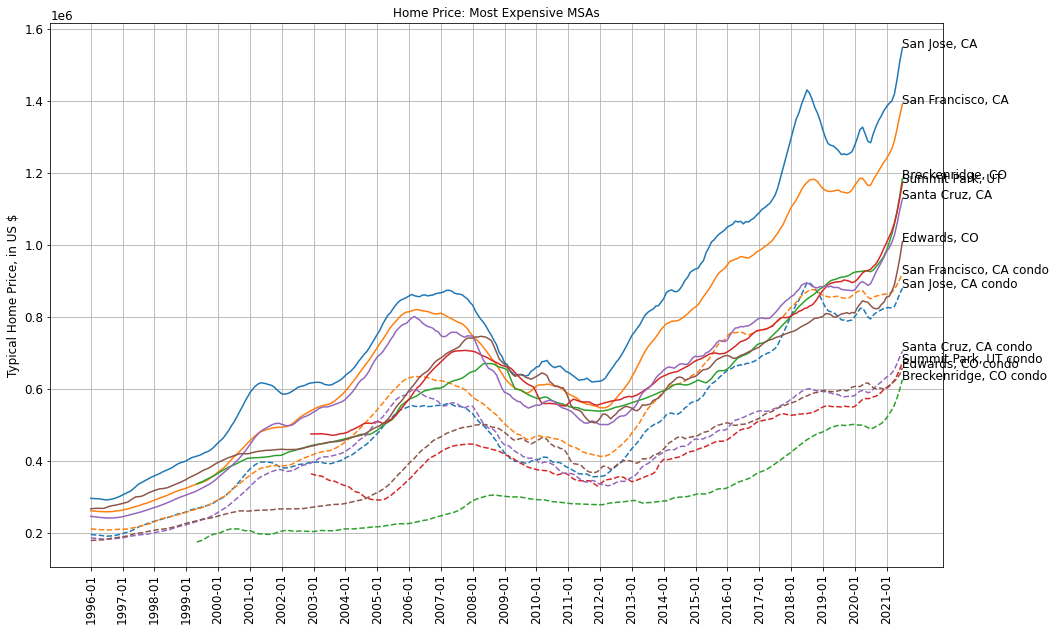

In [25]:

# plot of the most expensive MSAs
d1=d[d['month']==d['month'].values[-1]]
d1=d1.sort_values(by='sfr',ascending=False)
SizeRank_to_plot=d1['SizeRank'].values[:6]

plt.figure(num=2,figsize=(16,10))
plt.clf()
freqeuency=12

for i in SizeRank_to_plot:
    temp=d[d['SizeRank']==i]
    line,=plt.plot(temp['month'],
             temp['sfr'],'-',
             label=temp['RegionName'].values[0])
    plt.plot(temp['month'],
             temp['con'],'--',
             color=line.get_color(),
             label=temp['RegionName'].values[0])
    plt.text(d['month'].values[-1],
             temp['sfr'].values[-1],
             temp['RegionName'].values[0])
    plt.text(d['month'].values[-1],
             temp['con'].values[-1],
             temp['RegionName'].values[0]+' condo')
    plt.xticks(temp['month'][::freqeuency])
    plt.xticks(rotation=90)
# plt.legend()
plt.grid('minor')
plt.title('Home Price: Most Expensive MSAs')
plt.ylabel('Typical Home Price, in US $')

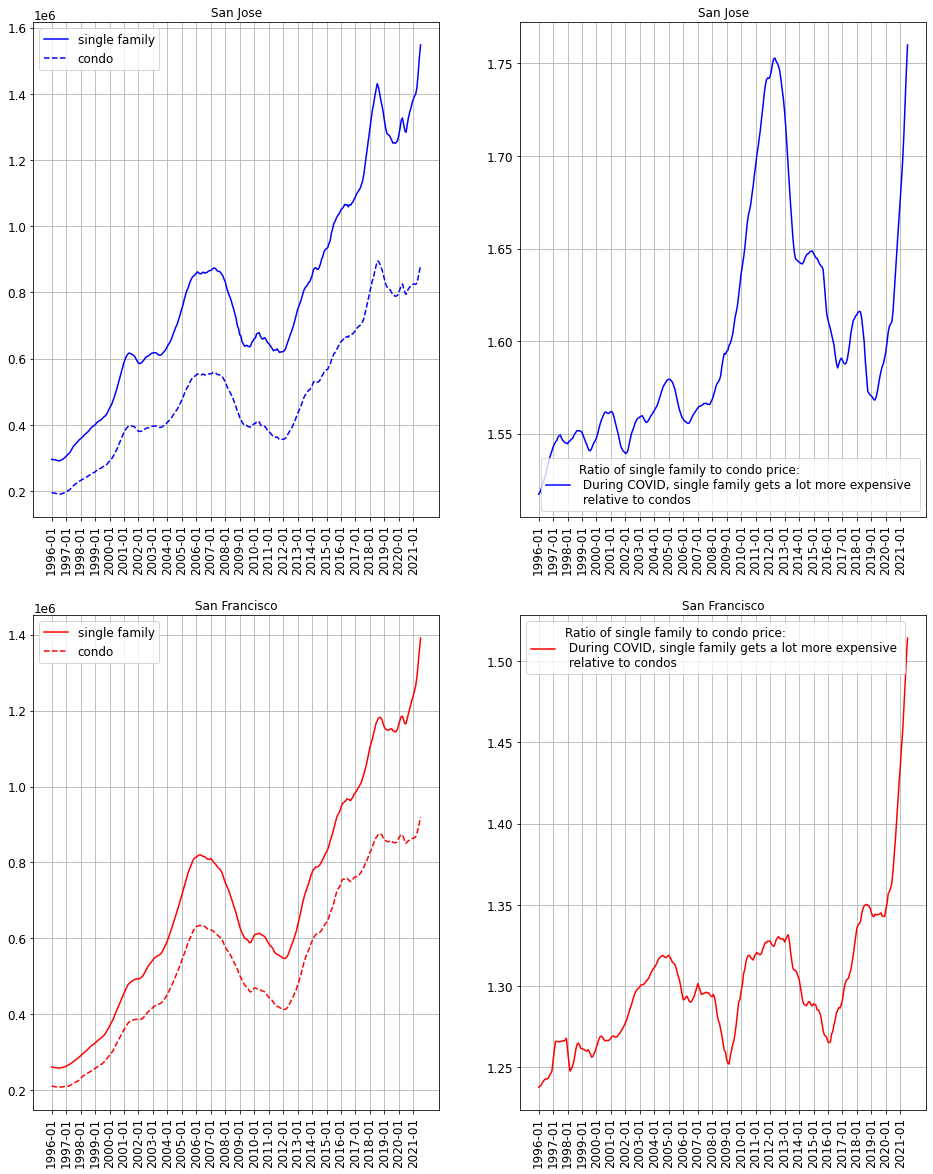

In [37]:
# housing price vs condo price in SF area

plt.figure(3,figsize=(16,20))
plt.clf()
SJ=d[d['RegionName']=='San Jose, CA']
SF=d[d['RegionName']=='San Francisco, CA']

plt.subplot(2,2,1)
plt.plot(SJ['month'],SJ['sfr'],'b-',SJ['month'],SJ['con'],'b--')
plt.grid('minor')
plt.title('San Jose')
plt.legend(['single family','condo'])
plt.xticks(SJ['month'][::freqeuency])
plt.xticks(rotation=90);

plt.subplot(2,2,2)
plt.plot(SJ['month'],SJ['sfr']/SJ['con'],'b-')
plt.grid('minor')
plt.title('San Jose')
plt.legend(['Ratio of single family to condo price: \n During COVID, single family gets a lot more expensive \n relative to condos'])
plt.xticks(SJ['month'][::freqeuency])
plt.xticks(rotation=90);

plt.subplot(2,2,3)
plt.plot(SF['month'],SF['sfr'],'r-',SF['month'],SF['con'],'r--')
plt.grid('minor')
plt.title('San Francisco')
plt.legend(['single family','condo'])
plt.xticks(SF['month'][::freqeuency])
plt.xticks(rotation=90);

plt.subplot(2,2,4)
plt.plot(SF['month'],SF['sfr']/SF['con'],'r-')
plt.grid('minor')
plt.title('San Francisco')
plt.legend(['Ratio of single family to condo price: \n During COVID, single family gets a lot more expensive \n relative to condos'])
plt.xticks(SF['month'][::freqeuency])
plt.xticks(rotation=90);


In [54]:

# For each MSA, normalize sfr and condo price to 100 for year 2005
RegionName_list=np.unique(d['RegionName'])
for i,region in enumerate(RegionName_list):
    d.loc[d['RegionName']==region,'sfrN']=d.loc[d['RegionName']==region,'sfr']/d.loc[(d['RegionName']==region) & (d['month']=='2005-01'),'sfr'].values[0]
    d.loc[d['RegionName']==region,'conN']=d.loc[d['RegionName']==region,'con']/d.loc[(d['RegionName']==region) & (d['month']=='2005-01'),'con'].values[0]




In [50]:
d2=d1.sort_values(by='SizeRank',ascending='False')
d2.head(30)

,RegionName,RegionType,StateName,SizeRank,month,sfr,con
247249,"New York, NY",Msa,NY,1,2021-07,561516.0,509831.0
247250,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,2,2021-07,871939.0,634426.0
247251,"Chicago, IL",Msa,IL,3,2021-07,286066.0,223491.0
247252,"Dallas-Fort Worth, TX",Msa,TX,4,2021-07,315650.0,207911.0
247253,"Philadelphia, PA",Msa,PA,5,2021-07,307472.0,234775.0
247254,"Houston, TX",Msa,TX,6,2021-07,261495.0,158841.0
247255,"Washington, DC",Msa,DC,7,2021-07,539335.0,334411.0
247256,"Miami-Fort Lauderdale, FL",Msa,FL,8,2021-07,411829.0,217219.0
247257,"Atlanta, GA",Msa,GA,9,2021-07,304469.0,250879.0
247258,"Boston, MA",Msa,MA,10,2021-07,617159.0,487447.0


Text(0.5, 1.0, 'Single Family Price: Selected MSAs')

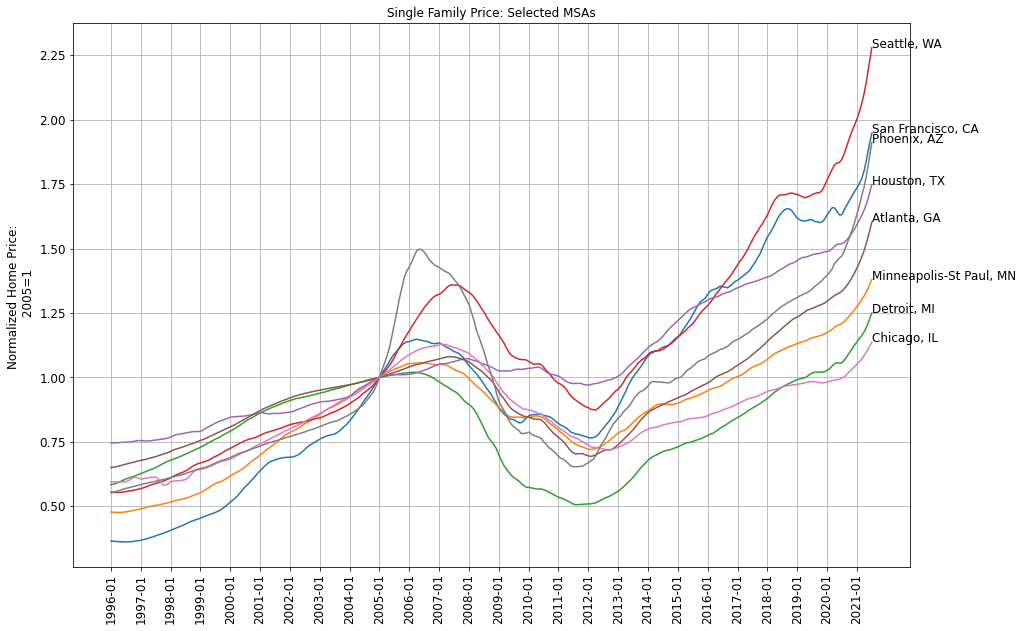

In [53]:
# comparison of normalized housing prices in selected MSAs

MSA_list=['San Francisco, CA',
          'Minneapolis-St Paul, MN',
          'Detroit, MI',
          'Seattle, WA',
          'Houston, TX',
          'Atlanta, GA',
          'Chicago, IL',
          'Phoenix, AZ']


plt.figure(4,figsize=(15,10))
plt.clf()

for i,MSA in enumerate(MSA_list):
    temp=d[d['RegionName']==MSA]

    plt.plot(temp['month'],temp['sfrN'])
    plt.text(temp['month'].values[-1],temp['sfrN'].values[-1],MSA)
    plt.xticks(SF['month'][::freqeuency])
    plt.xticks(rotation=90);

plt.grid('minor')
plt.ylabel('Normalized Home Price: \n 2005=1')
plt.title('Single Family Price: Selected MSAs')
